kaggle ~ https://www.kaggle.com/datasets/joebeachcapital/nintendo-games

In [333]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [334]:
# Load dataset
Games = pd.read_csv('NintendoGames.csv')
Games

,meta_score,title,platform,date,user_score,link,esrb_rating,developers,genres
0,NaN,Super Mario RPG,Switch,"Nov 17, 2023",NaN,/game/switch/super-mario-rpg,E,['Nintendo'],"['Role-Playing', 'Japanese-Style']"
1,NaN,WarioWare: Move It!,Switch,"Nov 3, 2023",NaN,/game/switch/warioware-move-it!,RP,['Intelligent Systems'],"['Miscellaneous', 'Party / Minigame']"
2,NaN,Super Mario Bros. Wonder,Switch,"Oct 20, 2023",NaN,/game/switch/super-mario-bros-wonder,E,['Nintendo'],"['Action', 'Platformer', '2D']"
3,NaN,Detective Pikachu Returns,Switch,"Oct 6, 2023",NaN,/game/switch/detective-pikachu-returns,NaN,['Creatures Inc.'],"['Adventure', '3D', 'Third-Person']"
4,NaN,Fae Farm,Switch,"Sep 8, 2023",NaN,/game/switch/fae-farm,E10+,['Phoenix Labs'],"['Simulation', 'Virtual', 'Virtual Life']"
...,...,...,...,...,...,...,...,...,...
1089,NaN,Yo-kai Watch 4,Switch,TBA,NaN,/game/switch/yo-kai-watch-4,E10+,['Level 5'],"['Role-Playing', 'Trainer']"
1090,NaN,Splatoon 3: Expansion Pass Wave 2 - Side Order,Switch,TBA,NaN,/game/switch/splatoon-3-expansion-pass-wave-2-...,NaN,['Nintendo'],"['Action', 'Shooter', 'Third-Person', 'Arcade']"
1091,NaN,Mario Kart 8 Deluxe: Booster Course Pass - Wave 6,Switch,TBA,NaN,/game/switch/mario-kart-8-deluxe-booster-cours...,NaN,['Nintendo'],"['Racing', 'Arcade', 'Automobile']"
1092,NaN,Princess Peach for Nintendo Switch,Switch,TBA 2024,NaN,/game/switch/princess-peach-for-nintendo-switch,NaN,['Nintendo'],"['Adventure', 'General']"


In [335]:
Games.isnull().sum()

meta_score     385
title            0
platform         0
date             0
user_score     238
link             0
esrb_rating    122
developers       3
genres           0
dtype: int64

We can use the games which don't have meta scores as a holdout set and train and test with the remaining games

In [336]:
HoldoutData = Games[Games['meta_score'].isnull() == True]
HoldoutData

,meta_score,title,platform,date,user_score,link,esrb_rating,developers,genres
0,NaN,Super Mario RPG,Switch,"Nov 17, 2023",NaN,/game/switch/super-mario-rpg,E,['Nintendo'],"['Role-Playing', 'Japanese-Style']"
1,NaN,WarioWare: Move It!,Switch,"Nov 3, 2023",NaN,/game/switch/warioware-move-it!,RP,['Intelligent Systems'],"['Miscellaneous', 'Party / Minigame']"
2,NaN,Super Mario Bros. Wonder,Switch,"Oct 20, 2023",NaN,/game/switch/super-mario-bros-wonder,E,['Nintendo'],"['Action', 'Platformer', '2D']"
3,NaN,Detective Pikachu Returns,Switch,"Oct 6, 2023",NaN,/game/switch/detective-pikachu-returns,NaN,['Creatures Inc.'],"['Adventure', '3D', 'Third-Person']"
4,NaN,Fae Farm,Switch,"Sep 8, 2023",NaN,/game/switch/fae-farm,E10+,['Phoenix Labs'],"['Simulation', 'Virtual', 'Virtual Life']"
...,...,...,...,...,...,...,...,...,...
1089,NaN,Yo-kai Watch 4,Switch,TBA,NaN,/game/switch/yo-kai-watch-4,E10+,['Level 5'],"['Role-Playing', 'Trainer']"
1090,NaN,Splatoon 3: Expansion Pass Wave 2 - Side Order,Switch,TBA,NaN,/game/switch/splatoon-3-expansion-pass-wave-2-...,NaN,['Nintendo'],"['Action', 'Shooter', 'Third-Person', 'Arcade']"
1091,NaN,Mario Kart 8 Deluxe: Booster Course Pass - Wave 6,Switch,TBA,NaN,/game/switch/mario-kart-8-deluxe-booster-cours...,NaN,['Nintendo'],"['Racing', 'Arcade', 'Automobile']"
1092,NaN,Princess Peach for Nintendo Switch,Switch,TBA 2024,NaN,/game/switch/princess-peach-for-nintendo-switch,NaN,['Nintendo'],"['Adventure', 'General']"


In [337]:
Games = Games[~Games['title'].isin(HoldoutData['title'])]
Games

,meta_score,title,platform,date,user_score,link,esrb_rating,developers,genres
5,87.0,Pikmin 4,Switch,"Jul 21, 2023",9.0,/game/switch/pikmin-4,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']"
7,74.0,Mario Kart 8 Deluxe: Booster Course Pass - Wave 5,Switch,"Jul 12, 2023",7.6,/game/switch/mario-kart-8-deluxe-booster-cours...,NaN,['Nintendo'],"['Racing', 'Arcade', 'Automobile']"
8,56.0,Everybody 1-2-Switch!,Switch,"Jun 30, 2023",5.4,/game/switch/everybody-1-2-switch!,E,['Nintendo'],"['Miscellaneous', 'Party / Minigame']"
9,82.0,Pikmin 1,Switch,"Jun 21, 2023",8.4,/game/switch/pikmin-1,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']"
10,65.0,Pikmin 2,Switch,"Jun 21, 2023",8.6,/game/switch/pikmin-2,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']"
...,...,...,...,...,...,...,...,...,...
1064,88.0,Diddy Kong Racing,N64,"Nov 24, 1997",8.4,/game/nintendo-64/diddy-kong-racing,E,['Rare Ltd.'],"['Driving', 'Racing', 'Kart']"
1065,96.0,GoldenEye 007,N64,"Aug 25, 1997",8.9,/game/nintendo-64/goldeneye-007,T,['Rare Ltd.'],"['Action', 'Shooter', 'First-Person', 'Modern']"
1067,90.0,Blast Corps,N64,"Feb 28, 1997",8.4,/game/nintendo-64/blast-corps,E,['Rare Ltd.'],"['Action', 'General']"
1070,80.0,Pilotwings 64,N64,"Sep 29, 1996",7.9,/game/nintendo-64/pilotwings-64,E,['Paradigm Entertainment'],"['Simulation', 'General']"


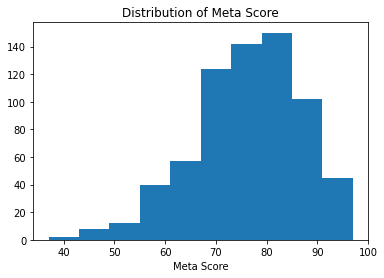

In [338]:
plt.hist(Games.meta_score)
plt.xlabel('Meta Score')
plt.title('Distribution of Meta Score')
plt.show()

## Data Cleaning

In [339]:
Games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 5 to 1081
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   meta_score   682 non-null    float64
 1   title        682 non-null    object 
 2   platform     682 non-null    object 
 3   date         682 non-null    object 
 4   user_score   663 non-null    float64
 5   link         682 non-null    object 
 6   esrb_rating  647 non-null    object 
 7   developers   682 non-null    object 
 8   genres       682 non-null    object 
dtypes: float64(2), object(7)
memory usage: 53.3+ KB


In [340]:
# Don't need title or link
Games.drop(columns=['title', 'link'], inplace=True)
Games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 5 to 1081
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   meta_score   682 non-null    float64
 1   platform     682 non-null    object 
 2   date         682 non-null    object 
 3   user_score   663 non-null    float64
 4   esrb_rating  647 non-null    object 
 5   developers   682 non-null    object 
 6   genres       682 non-null    object 
dtypes: float64(2), object(5)
memory usage: 42.6+ KB


/Users/bdogellis/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [341]:
Games

,meta_score,platform,date,user_score,esrb_rating,developers,genres
5,87.0,Switch,"Jul 21, 2023",9.0,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']"
7,74.0,Switch,"Jul 12, 2023",7.6,NaN,['Nintendo'],"['Racing', 'Arcade', 'Automobile']"
8,56.0,Switch,"Jun 30, 2023",5.4,E,['Nintendo'],"['Miscellaneous', 'Party / Minigame']"
9,82.0,Switch,"Jun 21, 2023",8.4,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']"
10,65.0,Switch,"Jun 21, 2023",8.6,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']"
...,...,...,...,...,...,...,...
1064,88.0,N64,"Nov 24, 1997",8.4,E,['Rare Ltd.'],"['Driving', 'Racing', 'Kart']"
1065,96.0,N64,"Aug 25, 1997",8.9,T,['Rare Ltd.'],"['Action', 'Shooter', 'First-Person', 'Modern']"
1067,90.0,N64,"Feb 28, 1997",8.4,E,['Rare Ltd.'],"['Action', 'General']"
1070,80.0,N64,"Sep 29, 1996",7.9,E,['Paradigm Entertainment'],"['Simulation', 'General']"


In [342]:
# Need to change date to datetime
Games[Games['date'] == 'TBA']


,meta_score,platform,date,user_score,esrb_rating,developers,genres
577,69.0,WII,TBA,8.8,NaN,['Monolith Soft'],"['Action', 'General']"
578,66.0,WII,TBA,7.8,NaN,['Cing'],"['Adventure', 'General']"


In [343]:
Games = Games[Games['date'] != 'TBA']
Games

,meta_score,platform,date,user_score,esrb_rating,developers,genres
5,87.0,Switch,"Jul 21, 2023",9.0,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']"
7,74.0,Switch,"Jul 12, 2023",7.6,NaN,['Nintendo'],"['Racing', 'Arcade', 'Automobile']"
8,56.0,Switch,"Jun 30, 2023",5.4,E,['Nintendo'],"['Miscellaneous', 'Party / Minigame']"
9,82.0,Switch,"Jun 21, 2023",8.4,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']"
10,65.0,Switch,"Jun 21, 2023",8.6,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']"
...,...,...,...,...,...,...,...
1064,88.0,N64,"Nov 24, 1997",8.4,E,['Rare Ltd.'],"['Driving', 'Racing', 'Kart']"
1065,96.0,N64,"Aug 25, 1997",8.9,T,['Rare Ltd.'],"['Action', 'Shooter', 'First-Person', 'Modern']"
1067,90.0,N64,"Feb 28, 1997",8.4,E,['Rare Ltd.'],"['Action', 'General']"
1070,80.0,N64,"Sep 29, 1996",7.9,E,['Paradigm Entertainment'],"['Simulation', 'General']"


In [344]:
Games[Games['date'] == 'Canceled']

,meta_score,platform,date,user_score,esrb_rating,developers,genres
1081,68.0,WIIU,Canceled,7.8,NaN,['TOSE'],"['Action', 'Miscellaneous', 'Rhythm', 'Music',..."


In [345]:
Games = Games[Games['date'] != 'Canceled']
Games

,meta_score,platform,date,user_score,esrb_rating,developers,genres
5,87.0,Switch,"Jul 21, 2023",9.0,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']"
7,74.0,Switch,"Jul 12, 2023",7.6,NaN,['Nintendo'],"['Racing', 'Arcade', 'Automobile']"
8,56.0,Switch,"Jun 30, 2023",5.4,E,['Nintendo'],"['Miscellaneous', 'Party / Minigame']"
9,82.0,Switch,"Jun 21, 2023",8.4,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']"
10,65.0,Switch,"Jun 21, 2023",8.6,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']"
...,...,...,...,...,...,...,...
1062,92.0,N64,"May 31, 1998",9.2,E,['Rare Ltd.'],"['Action', 'Platformer', '3D']"
1064,88.0,N64,"Nov 24, 1997",8.4,E,['Rare Ltd.'],"['Driving', 'Racing', 'Kart']"
1065,96.0,N64,"Aug 25, 1997",8.9,T,['Rare Ltd.'],"['Action', 'Shooter', 'First-Person', 'Modern']"
1067,90.0,N64,"Feb 28, 1997",8.4,E,['Rare Ltd.'],"['Action', 'General']"


In [346]:
Games['date'] = pd.to_datetime(Games['date'])
Games['date']

<ipython-input-346-5aa35d828550>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Games['date'] = pd.to_datetime(Games['date'])


5      2023-07-21
7      2023-07-12
8      2023-06-30
9      2023-06-21
10     2023-06-21
          ...    
1062   1998-05-31
1064   1997-11-24
1065   1997-08-25
1067   1997-02-28
1070   1996-09-29
Name: date, Length: 679, dtype: datetime64[ns]

In [347]:
# Year is the most important but month may prove useful as well

# Make separate year and month columns

Games['year'] = Games['date'].dt.year
Games['month'] = Games['date'].dt.month

Games

<ipython-input-347-ada2ba1b7d8a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Games['year'] = Games['date'].dt.year
<ipython-input-347-ada2ba1b7d8a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Games['month'] = Games['date'].dt.month


,meta_score,platform,date,user_score,esrb_rating,developers,genres,year,month
5,87.0,Switch,2023-07-21,9.0,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']",2023,7
7,74.0,Switch,2023-07-12,7.6,NaN,['Nintendo'],"['Racing', 'Arcade', 'Automobile']",2023,7
8,56.0,Switch,2023-06-30,5.4,E,['Nintendo'],"['Miscellaneous', 'Party / Minigame']",2023,6
9,82.0,Switch,2023-06-21,8.4,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']",2023,6
10,65.0,Switch,2023-06-21,8.6,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']",2023,6
...,...,...,...,...,...,...,...,...,...
1062,92.0,N64,1998-05-31,9.2,E,['Rare Ltd.'],"['Action', 'Platformer', '3D']",1998,5
1064,88.0,N64,1997-11-24,8.4,E,['Rare Ltd.'],"['Driving', 'Racing', 'Kart']",1997,11
1065,96.0,N64,1997-08-25,8.9,T,['Rare Ltd.'],"['Action', 'Shooter', 'First-Person', 'Modern']",1997,8
1067,90.0,N64,1997-02-28,8.4,E,['Rare Ltd.'],"['Action', 'General']",1997,2


In [348]:
# Drop date column

Games.drop(columns='date', inplace=True)
Games

/Users/bdogellis/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,meta_score,platform,user_score,esrb_rating,developers,genres,year,month
5,87.0,Switch,9.0,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']",2023,7
7,74.0,Switch,7.6,NaN,['Nintendo'],"['Racing', 'Arcade', 'Automobile']",2023,7
8,56.0,Switch,5.4,E,['Nintendo'],"['Miscellaneous', 'Party / Minigame']",2023,6
9,82.0,Switch,8.4,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']",2023,6
10,65.0,Switch,8.6,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']",2023,6
...,...,...,...,...,...,...,...,...
1062,92.0,N64,9.2,E,['Rare Ltd.'],"['Action', 'Platformer', '3D']",1998,5
1064,88.0,N64,8.4,E,['Rare Ltd.'],"['Driving', 'Racing', 'Kart']",1997,11
1065,96.0,N64,8.9,T,['Rare Ltd.'],"['Action', 'Shooter', 'First-Person', 'Modern']",1997,8
1067,90.0,N64,8.4,E,['Rare Ltd.'],"['Action', 'General']",1997,2


In [350]:
Games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679 entries, 5 to 1070
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   meta_score   679 non-null    float64
 1   platform     679 non-null    object 
 2   user_score   660 non-null    float64
 3   esrb_rating  647 non-null    object 
 4   developers   679 non-null    object 
 5   genres       679 non-null    object 
 6   year         679 non-null    int64  
 7   month        679 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 47.7+ KB


In [351]:
Games.drop('genres', axis=1, inplace=True)

/Users/bdogellis/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [55]:
# Need to extract genres since it's multivariable

Games['genres'] = Games['genres'].str.replace(r"[\[\]']", '', regex=True).str.split(', ')
Games['genres']

<ipython-input-55-b7afb8015f0c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Games['genres'] = Games['genres'].str.replace(r"[\[\]']", '', regex=True).str.split(', ')


5                [Strategy, Real-Time, General]
7                  [Racing, Arcade, Automobile]
8             [Miscellaneous, Party / Minigame]
9                [Strategy, Real-Time, General]
10               [Strategy, Real-Time, General]
                         ...                   
1062                   [Action, Platformer, 3D]
1064                    [Driving, Racing, Kart]
1065    [Action, Shooter, First-Person, Modern]
1067                          [Action, General]
1070                      [Simulation, General]
Name: genres, Length: 679, dtype: object

In [63]:
# One-hot encode the genres

genre_dummies = Games['genres'].str.join('|').str.get_dummies()
genre_dummies

,"""Beat-Em-Up""","""Shoot-Em-Up""",2D,3D,Action,Action Adventure,Action RPG,Adventure,Alternative,Application,...,Tennis,Third-Person,Traditional,Trainer,Turn-Based,Vehicle,Vertical,Virtual,Virtual Life,Visual Novel
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1064,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1065,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1067,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
# Join genre dummy variables onto original dataframe

Games = pd.concat([Games, genre_dummies], axis=1)

# Drop genre variable

Games.drop('genres', axis=1, inplace=True)

Games

,meta_score,platform,user_score,esrb_rating,developers,year,month,"""Beat-Em-Up""","""Shoot-Em-Up""",2D,...,Tennis,Third-Person,Traditional,Trainer,Turn-Based,Vehicle,Vertical,Virtual,Virtual Life,Visual Novel
5,87.0,Switch,9.0,E10+,['Nintendo'],2023,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,74.0,Switch,7.6,NaN,['Nintendo'],2023,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,56.0,Switch,5.4,E,['Nintendo'],2023,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,82.0,Switch,8.4,E10+,['Nintendo'],2023,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,65.0,Switch,8.6,E10+,['Nintendo'],2023,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,92.0,N64,9.2,E,['Rare Ltd.'],1998,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1064,88.0,N64,8.4,E,['Rare Ltd.'],1997,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1065,96.0,N64,8.9,T,['Rare Ltd.'],1997,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1067,90.0,N64,8.4,E,['Rare Ltd.'],1997,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we just have to one-hot encode the rest of the categorical variables and we can start analyzing the impact each variable has on meta_score - our target variable

In [300]:
# First check NA values

Games.iloc[:, :7].isnull().sum()

meta_score      0
platform        0
user_score     19
esrb_rating    32
developers      0
year            0
month           0
dtype: int64

## Impute User Score

In [352]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

imputer.fit(Games[['user_score']])

Games['user_score'] = imputer.transform(Games[['user_score']])

Games

<ipython-input-352-9d0948fa31e3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Games['user_score'] = imputer.transform(Games[['user_score']])


,meta_score,platform,user_score,esrb_rating,developers,year,month
5,87.0,Switch,9.0,E10+,['Nintendo'],2023,7
7,74.0,Switch,7.6,NaN,['Nintendo'],2023,7
8,56.0,Switch,5.4,E,['Nintendo'],2023,6
9,82.0,Switch,8.4,E10+,['Nintendo'],2023,6
10,65.0,Switch,8.6,E10+,['Nintendo'],2023,6
...,...,...,...,...,...,...,...
1062,92.0,N64,9.2,E,['Rare Ltd.'],1998,5
1064,88.0,N64,8.4,E,['Rare Ltd.'],1997,11
1065,96.0,N64,8.9,T,['Rare Ltd.'],1997,8
1067,90.0,N64,8.4,E,['Rare Ltd.'],1997,2


In [353]:
Games.iloc[:, :7].isnull().sum()

meta_score      0
platform        0
user_score      0
esrb_rating    32
developers      0
year            0
month           0
dtype: int64

## Classification Task for Missing ESRB Ratings

User score can be imputed but we need to dig deeper into the missing values for esrb_rating and maybe assign them the most likely rating. Domain knowledge is useful for this task

In [354]:
# Unique ratings

Games['esrb_rating'].unique()

array(['E10+', nan, 'E', 'T', 'M'], dtype=object)

nan can be a rating - "Not Rated"

In [355]:
Games[Games['esrb_rating'].isnull()]

,meta_score,platform,user_score,esrb_rating,developers,year,month
7,74.0,Switch,7.600000,NaN,['Nintendo'],2023,7
11,80.0,Switch,8.500000,NaN,['Nintendo'],2023,6
17,86.0,Switch,7.800000,NaN,['Nintendo'],2023,3
26,83.0,Switch,7.300000,NaN,['Nintendo'],2022,12
34,77.0,Switch,6.800000,NaN,['Nintendo'],2022,8
48,82.0,Switch,7.900000,NaN,['Nintendo'],2021,11
51,65.0,iOS,6.000000,NaN,['Niantic Tokyo Studio'],2021,10
60,67.0,Switch,8.200000,NaN,['Omega Force'],2021,6
79,75.0,Switch,7.100000,NaN,['Game Freak'],2020,10
107,64.0,Switch,6.400000,NaN,['Nintendo'],2020,1


We can use a classification machine learning algorithm to identify the most likely esrb_rating for these titles

In [356]:
rating_test = Games[Games['esrb_rating'].isnull()]

rating_train = Games[Games['esrb_rating'].notnull()]

print(len(rating_test))
print(len(rating_train))

32
647


In [357]:
rating_train.isnull().sum()

meta_score     0
platform       0
user_score     0
esrb_rating    0
developers     0
year           0
month          0
dtype: int64

In [358]:
rating_test.drop(columns=['developers', 'platform'], inplace=True)

/Users/bdogellis/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


For the sake of this classification task, we will implement a decision tree for simplicity

In [359]:
# Split up into training and test sets

from sklearn.model_selection import train_test_split

X = rating_train.drop(columns=['esrb_rating', 'developers', 'platform'])
y = rating_train['esrb_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

print(len(X_train))
print(len(X_test))

517
130


In [360]:
# Implement simple Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

dc = DecisionTreeClassifier(random_state=23, max_depth=5)
dc.fit(X_train, y_train)

dc.score(X_test, y_test)


0.6692307692307692

We get around 69% accuracy which is better than random guessing, it'll do.

In [361]:
rating_imputed = rating_test.drop('esrb_rating', axis=1)
imputed_vals = dc.predict(rating_imputed)

imputed_vals

array(['E', 'E10+', 'E10+', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E',
       'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E',
       'E', 'E', 'E', 'E', 'E', 'E', 'E'], dtype=object)

In [362]:
# Get the indices of missing values in the 'esrb_rating' column

missing_indices = Games[Games['esrb_rating'].isnull()].index

# Impute the missing values in the original dataset

Games.loc[missing_indices, 'esrb_rating'] = imputed_vals

Games

/Users/bdogellis/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,meta_score,platform,user_score,esrb_rating,developers,year,month
5,87.0,Switch,9.0,E10+,['Nintendo'],2023,7
7,74.0,Switch,7.6,E,['Nintendo'],2023,7
8,56.0,Switch,5.4,E,['Nintendo'],2023,6
9,82.0,Switch,8.4,E10+,['Nintendo'],2023,6
10,65.0,Switch,8.6,E10+,['Nintendo'],2023,6
...,...,...,...,...,...,...,...
1062,92.0,N64,9.2,E,['Rare Ltd.'],1998,5
1064,88.0,N64,8.4,E,['Rare Ltd.'],1997,11
1065,96.0,N64,8.9,T,['Rare Ltd.'],1997,8
1067,90.0,N64,8.4,E,['Rare Ltd.'],1997,2


In [363]:
Games.iloc[:, :7].isnull().sum()

meta_score     0
platform       0
user_score     0
esrb_rating    0
developers     0
year           0
month          0
dtype: int64

We have now accounted for all null values in the dataset. We can go ahead and one-hot encode the rest of the categorical variables and get to the modeling portion

### Finishing One-Hot-Encoding

In [364]:
Games['platform'].value_counts()

3DS       153
Switch    130
DS        126
WII        79
GBA        62
GC         51
WIIU       50
N64        16
iOS        12
Name: platform, dtype: int64

In [365]:
# One-Hot-Encode platform variable

platform_dummies = pd.get_dummies(Games['platform'])

In [366]:
# Join platform dummy variables onto original dataframe

Games = pd.concat([Games, platform_dummies], axis=1)

# Drop genre variable

Games.drop('platform', axis=1, inplace=True)

Games

,meta_score,user_score,esrb_rating,developers,year,month,3DS,DS,GBA,GC,N64,Switch,WII,WIIU,iOS
5,87.0,9.0,E10+,['Nintendo'],2023,7,0,0,0,0,0,1,0,0,0
7,74.0,7.6,E,['Nintendo'],2023,7,0,0,0,0,0,1,0,0,0
8,56.0,5.4,E,['Nintendo'],2023,6,0,0,0,0,0,1,0,0,0
9,82.0,8.4,E10+,['Nintendo'],2023,6,0,0,0,0,0,1,0,0,0
10,65.0,8.6,E10+,['Nintendo'],2023,6,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,92.0,9.2,E,['Rare Ltd.'],1998,5,0,0,0,0,1,0,0,0,0
1064,88.0,8.4,E,['Rare Ltd.'],1997,11,0,0,0,0,1,0,0,0,0
1065,96.0,8.9,T,['Rare Ltd.'],1997,8,0,0,0,0,1,0,0,0,0
1067,90.0,8.4,E,['Rare Ltd.'],1997,2,0,0,0,0,1,0,0,0,0


In [367]:
# Same thing for developers

Games['developers'].value_counts()

['Nintendo']                                        159
['Intelligent Systems']                              39
['Game Freak']                                       37
['Level 5']                                          25
['HAL Labs']                                         25
                                                   ... 
['Square Enix', ' Acquire']                           1
['Nintendo', ' Arzest']                               1
['Poisoft']                                           1
['Koei']                                              1
['Genius Sonority Inc.', ' The Pokemon Company']      1
Name: developers, Length: 182, dtype: int64

In [368]:
Games['developers'].nunique()

182

We see that we have 182 unique entries in our developers column and a large majority are from Nintendo. I would say this variable doesn't give us much information, therefore we can drop it

In [369]:
Games.drop('developers', axis=1, inplace=True)

Games

,meta_score,user_score,esrb_rating,year,month,3DS,DS,GBA,GC,N64,Switch,WII,WIIU,iOS
5,87.0,9.0,E10+,2023,7,0,0,0,0,0,1,0,0,0
7,74.0,7.6,E,2023,7,0,0,0,0,0,1,0,0,0
8,56.0,5.4,E,2023,6,0,0,0,0,0,1,0,0,0
9,82.0,8.4,E10+,2023,6,0,0,0,0,0,1,0,0,0
10,65.0,8.6,E10+,2023,6,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,92.0,9.2,E,1998,5,0,0,0,0,1,0,0,0,0
1064,88.0,8.4,E,1997,11,0,0,0,0,1,0,0,0,0
1065,96.0,8.9,T,1997,8,0,0,0,0,1,0,0,0,0
1067,90.0,8.4,E,1997,2,0,0,0,0,1,0,0,0,0


In [370]:
# One hot encode esrb rating

Games['esrb_rating'].value_counts()

E       465
E10+    118
T        83
M        13
Name: esrb_rating, dtype: int64

In [371]:
esrb_dummies = pd.get_dummies(Games['esrb_rating'])

Games = pd.concat([Games, esrb_dummies], axis=1)

Games.drop('esrb_rating', axis=1, inplace=True)

Games

,meta_score,user_score,year,month,3DS,DS,GBA,GC,N64,Switch,WII,WIIU,iOS,E,E10+,M,T
5,87.0,9.0,2023,7,0,0,0,0,0,1,0,0,0,0,1,0,0
7,74.0,7.6,2023,7,0,0,0,0,0,1,0,0,0,1,0,0,0
8,56.0,5.4,2023,6,0,0,0,0,0,1,0,0,0,1,0,0,0
9,82.0,8.4,2023,6,0,0,0,0,0,1,0,0,0,0,1,0,0
10,65.0,8.6,2023,6,0,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,92.0,9.2,1998,5,0,0,0,0,1,0,0,0,0,1,0,0,0
1064,88.0,8.4,1997,11,0,0,0,0,1,0,0,0,0,1,0,0,0
1065,96.0,8.9,1997,8,0,0,0,0,1,0,0,0,0,0,0,0,1
1067,90.0,8.4,1997,2,0,0,0,0,1,0,0,0,0,1,0,0,0


In [372]:
Games.reset_index(inplace=True)

Games.drop('index', axis=1, inplace=True)

Games

,meta_score,user_score,year,month,3DS,DS,GBA,GC,N64,Switch,WII,WIIU,iOS,E,E10+,M,T
0,87.0,9.0,2023,7,0,0,0,0,0,1,0,0,0,0,1,0,0
1,74.0,7.6,2023,7,0,0,0,0,0,1,0,0,0,1,0,0,0
2,56.0,5.4,2023,6,0,0,0,0,0,1,0,0,0,1,0,0,0
3,82.0,8.4,2023,6,0,0,0,0,0,1,0,0,0,0,1,0,0
4,65.0,8.6,2023,6,0,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,92.0,9.2,1998,5,0,0,0,0,1,0,0,0,0,1,0,0,0
675,88.0,8.4,1997,11,0,0,0,0,1,0,0,0,0,1,0,0,0
676,96.0,8.9,1997,8,0,0,0,0,1,0,0,0,0,0,0,0,1
677,90.0,8.4,1997,2,0,0,0,0,1,0,0,0,0,1,0,0,0


In [373]:
Games.iloc[:, :5].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   meta_score  679 non-null    float64
 1   user_score  679 non-null    float64
 2   year        679 non-null    int64  
 3   month       679 non-null    int64  
 4   3DS         679 non-null    uint8  
dtypes: float64(2), int64(2), uint8(1)
memory usage: 22.0 KB


Now all of our data is numeric and ready for machine learning

## Machine Learning

What algorithm will suit our data the best? Since we are trying to predict a continuous numeric variable, meta_score, we will employ regression techinques.<br>We'll start with a linear regression method.

### Linear Regression

In [374]:
# Split data into train and test sets

X = Games.drop('meta_score', axis=1)
y = Games['meta_score']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

print(X_train.shape)
print(X_test.shape)

(543, 16)
(136, 16)


In [375]:
y_train

554    85.0
664    71.0
115    75.0
628    81.0
458    63.0
       ... 
237    89.0
31     73.0
488    78.0
40     67.0
595    77.0
Name: meta_score, Length: 543, dtype: float64

In [376]:
# Scale variables

# X_train = X_train.values.reshape(-1, 1)
# X_test = X_test.values.reshape(-1, 1)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train[0])

[ 1.3801348  -1.06543343  0.90043276 -0.53547162 -0.47802384 -0.3254325
  3.4099717  -0.16268076 -0.47220014 -0.34914299 -0.29694503 -0.13697345
 -1.46243917 -0.46342756 -0.14379392  2.68835874]


In [377]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'RMSE: {rmse}')

r2 = r2_score(y_test, y_pred)

print(f'R-squared: {r2}')

RMSE: 8.18971321008266
R-squared: 0.3388881108494002


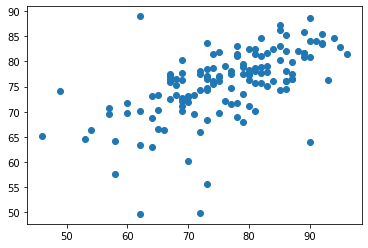

In [378]:
plt.scatter(y_test, y_pred)

In [391]:
# Finding coefficients of features

coefficients = lr.coef_
absolute_coefficients = np.abs(coefficients)
sorted_indices = np.argsort(absolute_coefficients)[::-1]
feature_names = X.columns 
top_features = feature_names[sorted_indices]

# Print the top N features and their coefficients
N = 16  # You can change N to see more or fewer top features
for i in range(N):
    feature = top_features[i]
    coefficient = coefficients[sorted_indices[i]]
    print(f"{feature}: {coefficient:.2f}")


user_score: 7.34
Switch: 1.32
WII: -0.99
N64: 0.72
GC: -0.70
month: 0.64
iOS: 0.52
GBA: -0.44
year: 0.27
WIIU: -0.19
M: -0.19
T: 0.15
E10+: -0.13
E: 0.06
3DS: -0.03
DS: -0.01


In [409]:
# User score and platform seem to have the highest influence on rating

# Rebuild model with only best predictors

X = Games[['user_score', 'year']]
y = Games['meta_score']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

print(X_train.shape)
print(X_test.shape)

sc2 = StandardScaler()
X_train = sc2.fit_transform(X_train)
X_test = sc2.transform(X_test)

lr2 = LinearRegression()
lr2.fit(X_train, y_train)

y_pred = lr2.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'RMSE: {rmse}')

r2 = r2_score(y_test, y_pred)

print(f'R-squared: {r2}')


(543, 2)
(136, 2)
RMSE: 8.533402584975125
R-squared: 0.28223537558375555


In [403]:
coefficients = lr2.coef_
absolute_coefficients = np.abs(coefficients)
sorted_indices = np.argsort(absolute_coefficients)[::-1]
feature_names = X.columns 
top_features = feature_names[sorted_indices]

# Print the top N features and their coefficients
N = 2  # You can change N to see more or fewer top features
for i in range(N):
    feature = top_features[i]
    coefficient = coefficients[sorted_indices[i]]
    print(f"{feature}: {coefficient:.2f}")

user_score: 7.16
year: 1.39


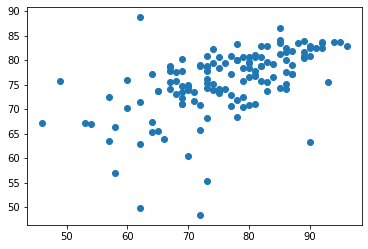

In [404]:
plt.scatter(y_test, y_pred)

## Decision Trees

In [412]:
# Split data into train and test sets

X = Games.drop('meta_score', axis=1)
y = Games['meta_score']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

print(X_train.shape)
print(X_test.shape)

(543, 16)
(136, 16)


In [413]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train[0])

[ 1.3801348  -1.06543343  0.90043276 -0.53547162 -0.47802384 -0.3254325
  3.4099717  -0.16268076 -0.47220014 -0.34914299 -0.29694503 -0.13697345
 -1.46243917 -0.46342756 -0.14379392  2.68835874]


In [414]:
from sklearn.tree import DecisionTreeRegressor

dcr = DecisionTreeRegressor()
dcr.fit(X_train, y_train)

y_pred = dcr.predict(X_test)

In [415]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'RMSE: {rmse}')

r2 = r2_score(y_test, y_pred)

print(f'R-squared: {r2}')

RMSE: 9.91289679537808
R-squared: 0.031412747001215546


## Random Forests

In [416]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'RMSE: {rmse}')

r2 = r2_score(y_test, y_pred)

print(f'R-squared: {r2}')


RMSE: 7.715856285342394
R-squared: 0.4131787397764073


Random Forest gives us the best predictions which can be expected due to the large number of variables and low samples

In [418]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search

grid_search = GridSearchCV(estimator=RandomForestRegressor(),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',  # Use negative mean squared error for regression
                           cv=5,  # Cross-validation folds
                           n_jobs=-1)  # Use all available CPU cores

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

y_pred = best_estimator.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Best Parameters: {best_params}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')


Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
RMSE: 7.4582126319849875
R-squared: 0.45171406963336225


## Gradient Boosting

In [417]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'RMSE: {rmse}')

r2 = r2_score(y_test, y_pred)

print(f'R-squared: {r2}')

RMSE: 7.678424688113376
R-squared: 0.4188585699159312


In [419]:
# Define parameter grid

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
}

# Perfrom grid search

grid_search = GridSearchCV(estimator=GradientBoostingRegressor(),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',  # Use negative mean squared error for regression
                           cv=5,  # Cross-validation folds
                           n_jobs=-1)  # Use all available CPU cores


grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

y_pred = best_estimator.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Best Parameters: {best_params}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 300}
RMSE: 7.4104372591611245
R-squared: 0.45871592603970246


The best results we obtain is from our gradient boosting regressor

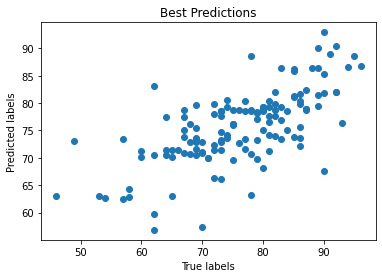

In [420]:
plt.scatter(y_test, y_pred)
plt.xlabel("True labels")
plt.ylabel("Predicted labels")
plt.title("Best Predictions")
plt.show()

## Predicting Games without Scores